In [1]:
#install xgboost
!pip install xgboost

#optuna
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.1 MB/s eta 0:00:00


In [2]:
#===== Set Up Library =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import (r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error)
from sklearn.model_selection import train_test_split

import optuna

def load_data():
  data = pd.read_csv("https://raw.githubusercontent.com/bayuzen19/dataset_ensemble_ngajar/main/realest.csv")
  data =  data.dropna()
  return data

In [3]:
df = load_data()

In [4]:
df.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [5]:
X = df.drop('Price',axis=1)
y = df['Price']

In [6]:
#==== Set Up model ====
xgb = XGBRegressor(random_state=42)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
linear = LinearRegression() #baseline model

In [7]:
#iterate model
ml = [('Linear Regression',linear),
      ('Decission Trees',dt),
         ('Random Forest',rf),
         ('Xgboost',xgb)]

r2_train = []
r2_test = []
mae_train = []
mae_test = []
mse_train = []
mse_test = []
rmse_train = []
rmse_test = []
models = []

for model in ml:
  for x in range(0,10):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3) # perlooping data training dan testing akan berubah
    model[1].fit(X_train,y_train)

    predict_train = model[1].predict(X_train)
    predict_test = model[1].predict(X_test)

    r2_score_train = r2_score(y_train,predict_train)
    r2_score_test = r2_score(y_test,predict_test)

    mae_score_train = mean_absolute_error(y_train,predict_train)
    mae_score_test = mean_absolute_error(y_test,predict_test)

    mse_score_train = mean_squared_error(y_train,predict_train)
    mse_score_test = mean_squared_error(y_test,predict_test)

    rmse_score_train = np.sqrt(mse_score_train)
    rmse_score_test = np.sqrt(mse_score_test)

    r2_train.append(r2_score_train)
    r2_test.append(r2_score_test)
    mae_train.append(mae_score_train)
    mae_test.append(mae_score_test)
    mse_train.append(mse_score_train)
    mse_test.append(mse_score_test)
    rmse_train.append(rmse_score_train)
    rmse_test.append(rmse_score_test)
    models.append(model[0])


df_metrics = pd.DataFrame({'model':models,
                           'r2_score_train':r2_train,
                           'r2_score_test':r2_test,
                           'MAE_train':mae_train,
                           'MAE_test':mae_test,
                           'MSE_train':mse_train,
                           'MSE_test':mse_test,
                           'RMSE_train':rmse_train,
                           'RMSE_test':rmse_test})

In [8]:
df_metrics

,model,r2_score_train,r2_score_test,MAE_train,MAE_test,MSE_train,MSE_test,RMSE_train,RMSE_test
0,Linear Regression,0.714838,0.674005,5.577450,6.124908,48.936370,56.679334,6.995454,7.528568
1,Linear Regression,0.673733,0.735219,5.406776,6.695989,46.571247,66.233858,6.824313,8.138419
2,Linear Regression,0.690496,0.748609,5.666160,5.746829,48.685295,55.035197,6.977485,7.418571
3,Linear Regression,0.720005,0.700876,5.896160,5.091365,51.780172,47.166382,7.195844,6.867779
4,Linear Regression,0.709944,0.697934,5.528962,5.952988,46.876982,62.909903,6.846677,7.931576
5,Linear Regression,0.717673,0.710098,5.237566,6.319165,45.065686,62.568481,6.713098,7.910024
6,Linear Regression,0.678940,0.759039,5.986393,5.484456,54.504044,45.221694,7.382685,6.724708
7,Linear Regression,0.703843,0.719878,5.587378,5.961027,49.192053,55.243174,7.013705,7.432575
8,Linear Regression,0.721346,0.690214,5.939724,4.816360,55.496817,37.903086,7.449619,6.156548
9,Linear Regression,0.760688,0.402529,5.487799,6.335064,50.093056,61.078764,7.077645,7.815290


In [9]:
#visualize
train_metrics = [x for x in df_metrics.columns if '_train' in x]
test_metrics = [x for x in df_metrics.columns if '_test' in x]

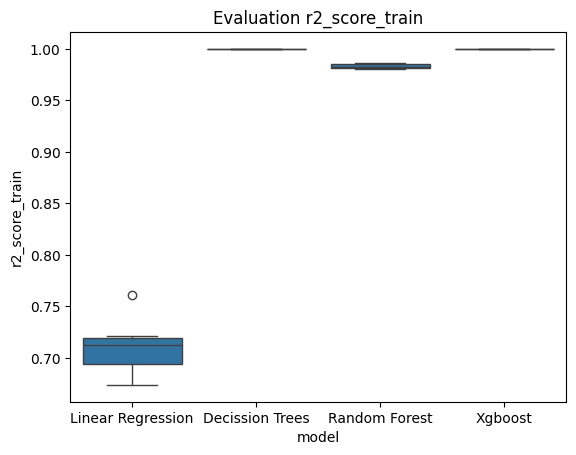

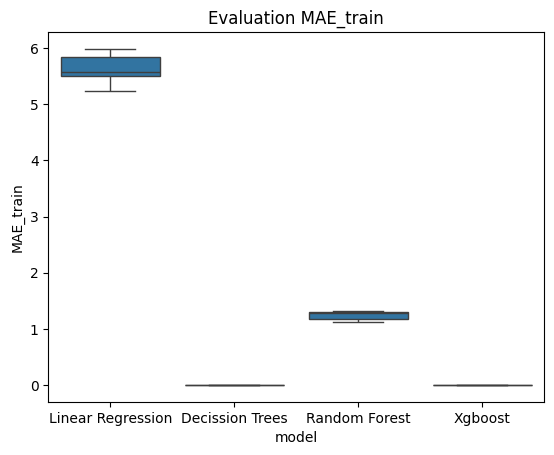

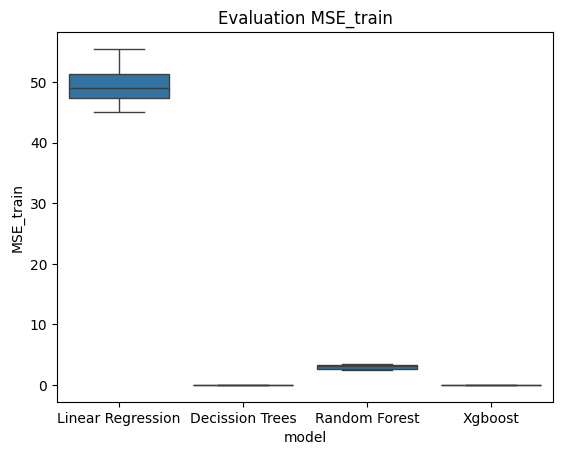

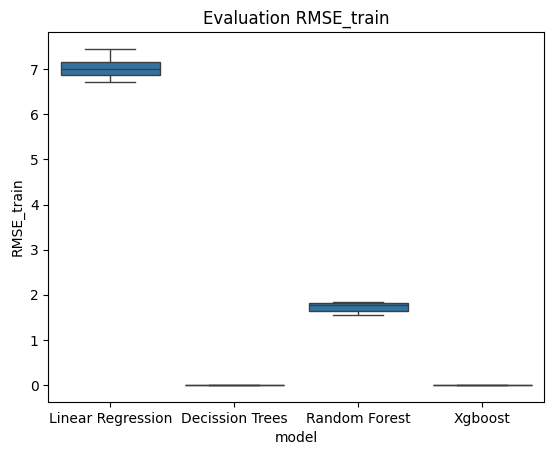

In [10]:
for train in train_metrics:
  plt.figure()
  sns.boxplot(data=df_metrics,x='model',y=train)
  plt.title(f"Evaluation {train}")
  plt.show()

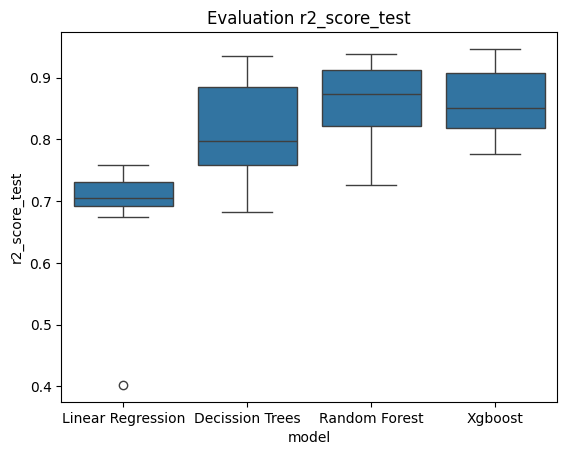

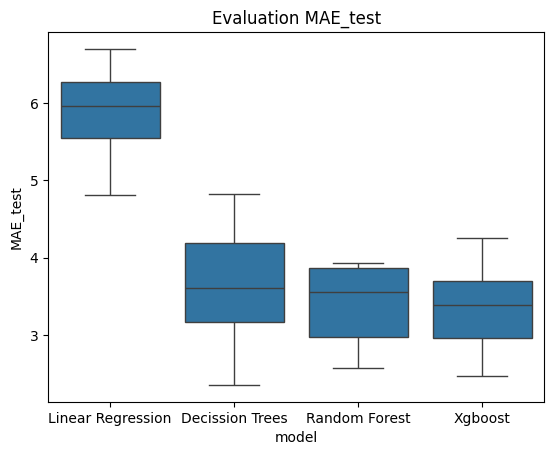

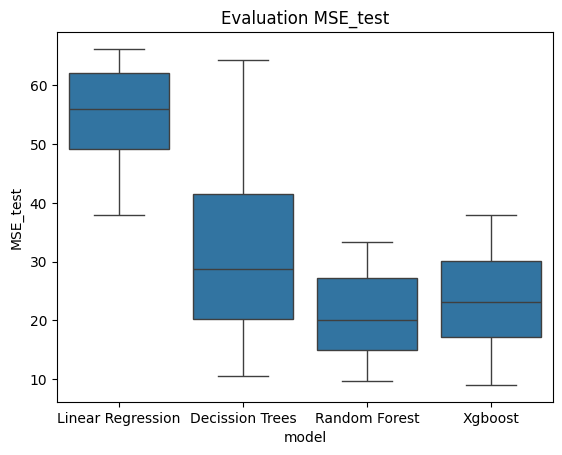

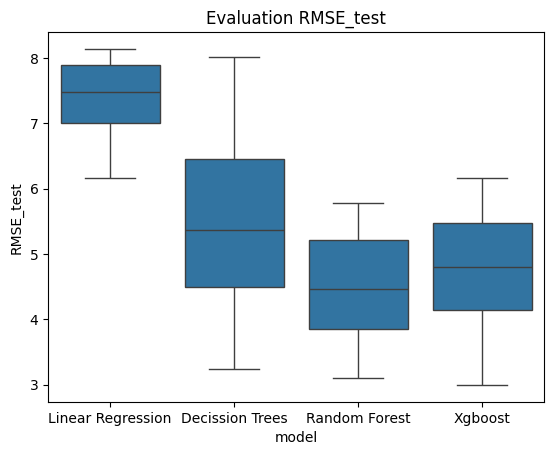

In [11]:
for test in test_metrics:
  plt.figure()
  sns.boxplot(data=df_metrics,x='model',y=test)
  plt.title(f"Evaluation {test}")
  plt.show()

In [12]:
#calculate mean and std
df_metrics.groupby('model').mean()

,r2_score_train,r2_score_test,MAE_train,MAE_test,MSE_train,MSE_test,RMSE_train,RMSE_test
model,,,,,,,,
Decission Trees,1.000000,0.811314,0.000000,3.605128,0.000000,33.651282,0.000000,5.597324
Linear Regression,0.709150,0.683840,5.631437,5.852815,49.720172,55.003987,7.047652,7.392406
Random Forest,0.983471,0.862087,1.245899,3.407410,3.003030,21.205763,1.729698,4.525888
Xgboost,1.000000,0.863411,0.001604,3.309129,0.000005,23.637607,0.002150,4.757884


In [13]:
round(df_metrics.groupby('model').std(),3)

,r2_score_train,r2_score_test,MAE_train,MAE_test,MSE_train,MSE_test,RMSE_train,RMSE_test
model,,,,,,,,
Decission Trees,0.000,0.088,0.000,0.811,0.000,18.807,0.000,1.606
Linear Regression,0.025,0.102,0.244,0.583,3.371,9.038,0.238,0.629
Random Forest,0.002,0.065,0.076,0.502,0.378,8.101,0.111,0.896
Xgboost,0.000,0.060,0.000,0.567,0.000,9.844,0.001,1.054


# Tuning Parameter XGBoost

In [14]:
#create train and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [15]:
learning_rate_list = [0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

learning_rate = []
rmse_score = []


for eta in learning_rate_list:
  xgb = XGBRegressor(learning_rate=eta,random_state=42).fit(X_train,y_train)
  rmse = np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
  rmse_score.append(rmse)
  learning_rate.append(eta)


#create dataset eta
df_eta = pd.DataFrame({'learning_rate':learning_rate,
                       'rmse_score':rmse_score})

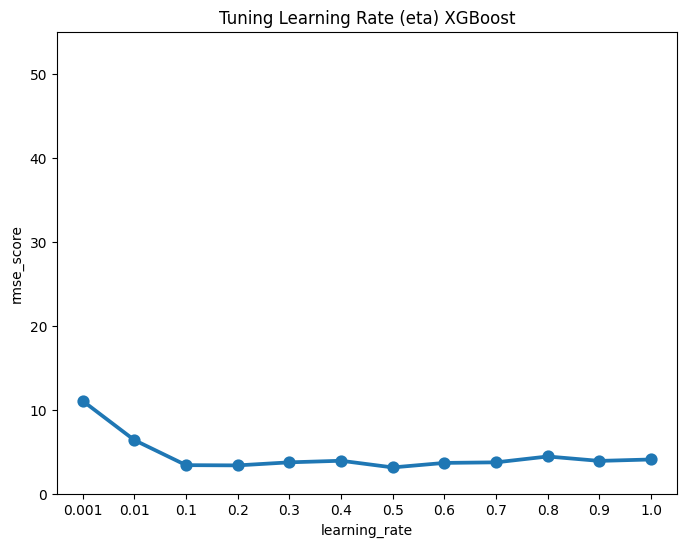

In [16]:
plt.figure(figsize=(8,6))
sns.pointplot(data=df_eta,x='learning_rate',y='rmse_score')
plt.title('Tuning Learning Rate (eta) XGBoost')
plt.ylim(0,55)
plt.show()

learning rate = 0.1

In [17]:
eta = 0.1

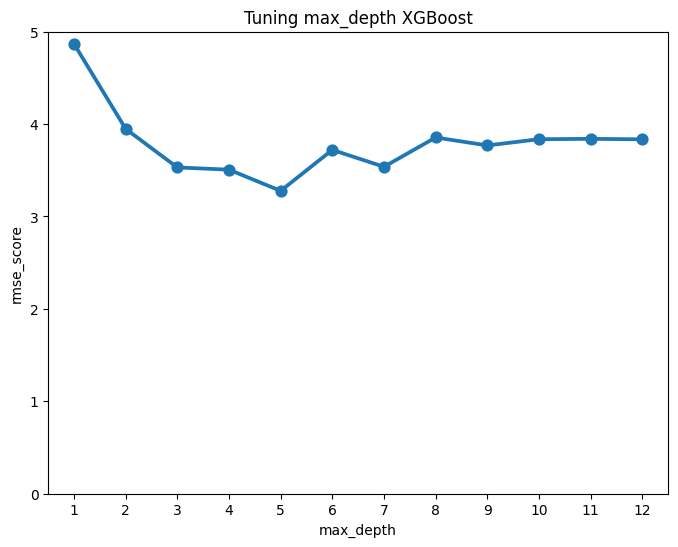

In [18]:
max_depth = []
rmse_score = []

for depth in range(1,13):
  xgb = XGBRegressor(max_depth=depth,random_state=42).fit(X_train,y_train)
  rmse = np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
  rmse_score.append(rmse)
  max_depth.append(depth)


#create dataset eta
df_max_depth = pd.DataFrame({'max_depth':max_depth,
                       'rmse_score':rmse_score})

plt.figure(figsize=(8,6))
sns.pointplot(data=df_max_depth,x='max_depth',y='rmse_score')
plt.title('Tuning max_depth XGBoost')
plt.ylim(0,5)
plt.show()

max_depth = 6

In [19]:
eta = 0.1
max_depth = 5

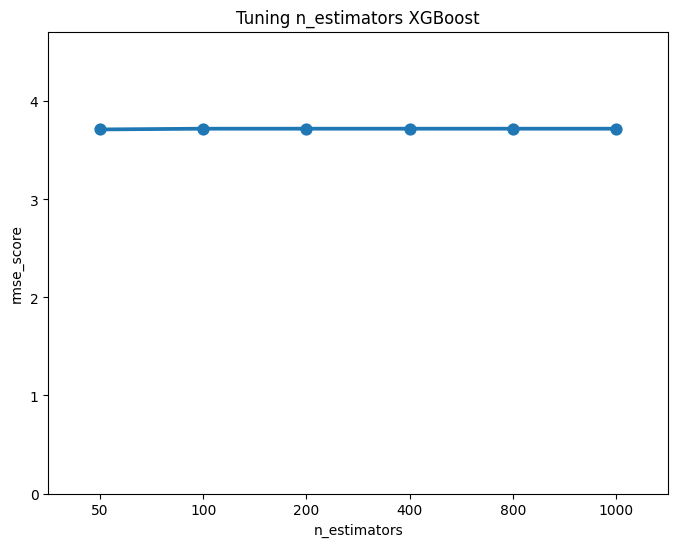

In [20]:
n_estimators = []
rmse_score = []

for estimator in [50, 100, 200, 400, 800,1000]:
  xgb = XGBRegressor(n_estimators=estimator).fit(X_train,y_train)
  rmse = np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
  rmse_score.append(rmse)
  n_estimators.append(estimator)


#create dataset eta
df_estimator = pd.DataFrame({'n_estimators':n_estimators,
                       'rmse_score':rmse_score})

plt.figure(figsize=(8,6))
sns.pointplot(data=df_estimator,x='n_estimators',y='rmse_score')
plt.title('Tuning n_estimators XGBoost')
plt.ylim(0,max(df_estimator['rmse_score'])+0.99)
plt.show()

n_estimators = 100

In [21]:
eta = 0.1
max_depth = 6
n_estimators = 100

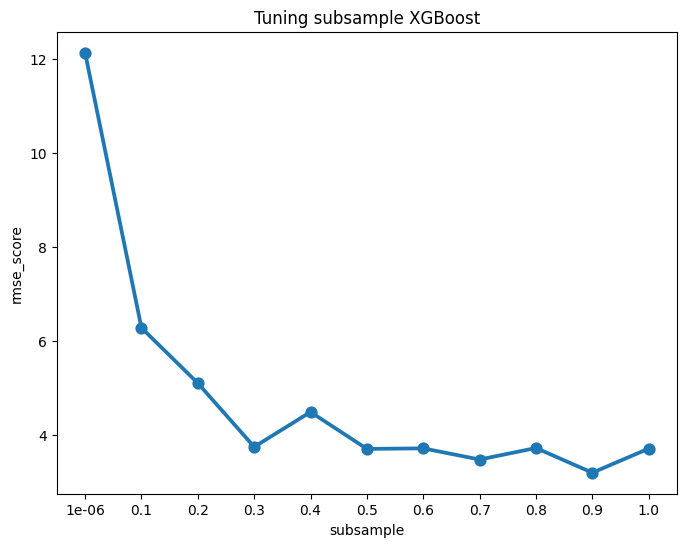

In [22]:
subsample = []
rmse_score = []

for sub in [0.000001,0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9, 1]:
  xgb = XGBRegressor(subsample=sub,random_state=42).fit(X_train,y_train)
  rmse = np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
  rmse_score.append(rmse)
  subsample.append(sub)


#create dataset eta
df_subsample = pd.DataFrame({'subsample':subsample,
                       'rmse_score':rmse_score})

plt.figure(figsize=(8,6))
sns.pointplot(data=df_subsample,x='subsample',y='rmse_score')
plt.title('Tuning subsample XGBoost')
plt.show()

subsample = 0.5

In [23]:
eta = 0.1
max_depth = 6
n_estimators = 100
subsample = 0.9

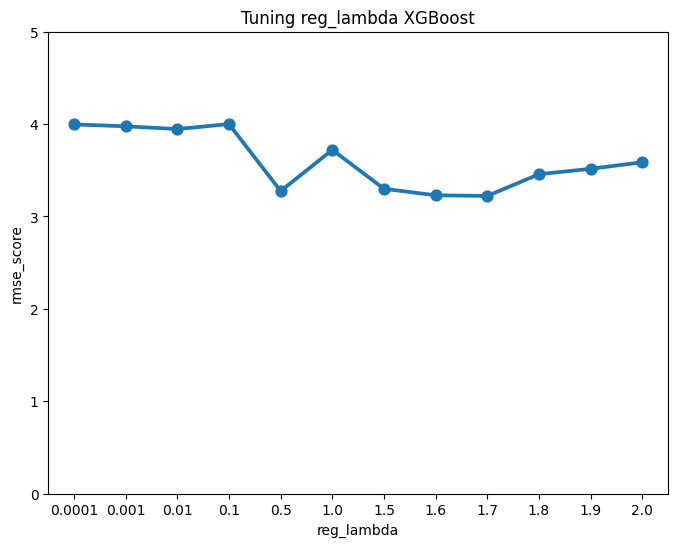

In [24]:
reg_lambda = []
rmse_score = []

for lambda_ in [0.0001,0.001, 0.01, 0.1, 0.5, 1, 1.5,1.6,1.7,1.8,1.9,2]:
    xgb = XGBRegressor(reg_lambda=lambda_,random_state=42).fit(X_train,y_train)
    rmse = np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
    rmse_score.append(rmse)
    reg_lambda.append(lambda_)


#create dataset eta
df_reg_lambda = pd.DataFrame({'reg_lambda':reg_lambda,
                       'rmse_score':rmse_score})

plt.figure(figsize=(8,6))
sns.pointplot(data=df_reg_lambda,x='reg_lambda',y='rmse_score')
plt.title('Tuning reg_lambda XGBoost')
plt.ylim(0,5)
plt.show()

reg_lambda = 0.5

In [25]:
eta = 0.1
max_depth = 6
n_estimators = 100
subsample = 0.5
reg_lambda = 0.5

# Perbandingan Tuning dan Tanpa Tuning

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [27]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train,y_train)


predict_train = xgb.predict(X_train)
predict_test = xgb.predict(X_test)

r2_score_train = r2_score(y_train,predict_train)
r2_score_test = r2_score(y_test,predict_test)

mae_score_train = mean_absolute_error(y_train,predict_train)
mae_score_test = mean_absolute_error(y_test,predict_test)

mse_score_train = mean_squared_error(y_train,predict_train)
mse_score_test = mean_squared_error(y_test,predict_test)

rmse_score_train = np.sqrt(mse_score_train)
rmse_score_test = np.sqrt(mse_score_test)

print('r2 score train',r2_score_train)
print('r2 score test',r2_score_test)
print('MAE train',mae_score_train)
print('MAE test',mae_score_test)
print('MSE train',mse_score_train)
print('MSE test',mse_score_test)
print('RMSE train',rmse_score_train)
print('RMSE test',rmse_score_test)

r2 score train 0.9999999831143105
r2 score test 0.9028134114717375
MAE train 0.0012604145521528266
MAE test 2.822795183230669
MSE train 3.2384241319632973e-06
MSE test 13.837044373536722
RMSE train 0.0017995622056387207
RMSE test 3.7198177876794882


In [28]:
# Put all together
xgb = XGBRegressor(eta = 0.1,
                  max_depth = 6,
                  n_estimators = 100,
                  subsample = 0.5,
                  reg_lambda = 0.5,
                  random_state=42)

xgb.fit(X_train,y_train)

predict_train = xgb.predict(X_train)
predict_test = xgb.predict(X_test)

r2_score_train = r2_score(y_train,predict_train)
r2_score_test = r2_score(y_test,predict_test)

mae_score_train = mean_absolute_error(y_train,predict_train)
mae_score_test = mean_absolute_error(y_test,predict_test)

mse_score_train = mean_squared_error(y_train,predict_train)
mse_score_test = mean_squared_error(y_test,predict_test)

rmse_score_train = np.sqrt(mse_score_train)
rmse_score_test = np.sqrt(mse_score_test)

print('r2 score train',r2_score_train)
print('r2 score test',r2_score_test)
print('MAE train',mae_score_train)
print('MAE test',mae_score_test)
print('MSE train',mse_score_train)
print('MSE test',mse_score_test)
print('RMSE train',rmse_score_train)
print('RMSE test',rmse_score_test)

r2 score train 0.9990566877677561
r2 score test 0.920026802907102
MAE train 0.32452506161807626
MAE test 2.4476292928059897
MSE train 0.18091325733727767
MSE test 11.386269377551239
RMSE train 0.4253389910850846
RMSE test 3.3743546609020276


In [29]:
def objective(trial):
    # Definisi ruang pencarian hyperparameter
    param = {
        'objective': 'reg:squarederror',
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
    }

    # Membuat dan melatih model XGBoost
    model = XGBRegressor(**param,random_state=42)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=False)

    # Melakukan prediksi dan menghitung MAPE
    preds = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, preds)

    return mape

study = optuna.create_study(direction='minimize')  # Menggunakan 'minimize' karena kita ingin mengurangi MAPE
study.optimize(objective, n_trials=100)

print('Best trial:', study.best_trial.params)

[I 2024-03-02 08:01:31,838] A new study created in memory with name: no-name-dfadc084-8bf4-4dba-9d07-43209528188d
<ipython-input-29-d456282fe769>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.1),
<ipython-input-29-d456282fe769>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 202

Best trial: {'learning_rate': 0.0360106284979576, 'max_depth': 4, 'n_estimators': 307, 'subsample': 0.9657261193740211, 'reg_lambda': 0.059397041387445906}


In [30]:
print("Best hyperparameters:", study.best_params)
print("Best value:", study.best_value)

Best hyperparameters: {'learning_rate': 0.0360106284979576, 'max_depth': 4, 'n_estimators': 307, 'subsample': 0.9657261193740211, 'reg_lambda': 0.059397041387445906}
Best value: 0.04209062531393281


In [31]:
import optuna.visualization as vis

vis.plot_param_importances(study)

In [32]:
#extract best parameters from optuna
best_params = study.best_trial.params
best_params

{'learning_rate': 0.0360106284979576,
 'max_depth': 4,
 'n_estimators': 307,
 'subsample': 0.9657261193740211,
 'reg_lambda': 0.059397041387445906}

In [33]:
# Put all together
xgb = XGBRegressor(**best_params,
                  random_state=42)

xgb.fit(X_train,y_train)

predict_train = xgb.predict(X_train)
predict_test = xgb.predict(X_test)

r2_score_train = r2_score(y_train,predict_train)
r2_score_test = r2_score(y_test,predict_test)

mae_score_train = mean_absolute_error(y_train,predict_train)
mae_score_test = mean_absolute_error(y_test,predict_test)

mse_score_train = mean_squared_error(y_train,predict_train)
mse_score_test = mean_squared_error(y_test,predict_test)

rmse_score_train = np.sqrt(mse_score_train)
rmse_score_test = np.sqrt(mse_score_test)

print('r2 score train',r2_score_train)
print('r2 score test',r2_score_test)
print('MAE train',mae_score_train)
print('MAE test',mae_score_test)
print('MSE train',mse_score_train)
print('MSE test',mse_score_test)
print('RMSE train',rmse_score_train)
print('RMSE test',rmse_score_test)

r2 score train 0.9995122155208092
r2 score test 0.9354452383132523
MAE train 0.24671323111887727
MAE test 2.201097146058694
MSE train 0.09354980884651586
MSE test 9.191053163913192
RMSE train 0.3058591323575542
RMSE test 3.0316749766281332


In [34]:
# Optuna with Cross Validation

from sklearn.model_selection import RepeatedKFold


def objective(trial):

    param = {
        'objective': 'reg:squarederror',
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
    }

    mape_scores = []
    rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

    for train_index, test_index in rkf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Membuat dan melatih model XGBoost
        model = XGBRegressor(**param)
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=False)

        # Melakukan prediksi dan menghitung MAPE
        preds = model.predict(X_test)
        mape = mean_absolute_percentage_error(y_test, preds)
        mape_scores.append(mape)

    return np.mean(mape_scores)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print('Best trial:', study.best_trial.params)

Output streaming akan dipotong hingga 5000 baris terakhir.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xg

Best trial: {'learning_rate': 0.08586375359127064, 'max_depth': 9, 'n_estimators': 918, 'subsample': 0.515263896599206, 'reg_lambda': 9.983862432654206}


In [35]:
# Put all together
xgb = XGBRegressor(**study.best_trial.params,
                  random_state=42)

xgb.fit(X_train,y_train)

predict_train = xgb.predict(X_train)
predict_test = xgb.predict(X_test)

r2_score_train = r2_score(y_train,predict_train)
r2_score_test = r2_score(y_test,predict_test)

mae_score_train = mean_absolute_error(y_train,predict_train)
mae_score_test = mean_absolute_error(y_test,predict_test)

mse_score_train = mean_squared_error(y_train,predict_train)
mse_score_test = mean_squared_error(y_test,predict_test)

rmse_score_train = np.sqrt(mse_score_train)
rmse_score_test = np.sqrt(mse_score_test)

print('r2 score train',r2_score_train)
print('r2 score test',r2_score_test)
print('MAE train',mae_score_train)
print('MAE test',mae_score_test)
print('MSE train',mse_score_train)
print('MSE test',mse_score_test)
print('RMSE train',rmse_score_train)
print('RMSE test',rmse_score_test)

r2 score train 0.9999604688069028
r2 score test 0.8946378710745455
MAE train 0.04342891393082865
MAE test 2.9257562099358974
MSE train 0.007581494933679658
MSE test 15.001045672138645
RMSE train 0.08707178035207307
RMSE test 3.8731183395474305


In [36]:
# Stacking Model
from sklearn.ensemble import StackingRegressor

# Definisi base models
base_models = [
    ('xgb', xgb),
    ('rf', RandomForestRegressor(random_state=42,max_depth=3))
]

# Definisi meta-model
meta_model = LinearRegression()

# Membuat stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model,cv=5)

# Melatih model stacking
stacking_regressor.fit(X_train, y_train)

# Mengevaluasi model
predict_train = stacking_regressor.predict(X_train)
predict_test = stacking_regressor.predict(X_test)

r2_score_train = r2_score(y_train,predict_train)
r2_score_test = r2_score(y_test,predict_test)

mae_score_train = mean_absolute_error(y_train,predict_train)
mae_score_test = mean_absolute_error(y_test,predict_test)

mse_score_train = mean_squared_error(y_train,predict_train)
mse_score_test = mean_squared_error(y_test,predict_test)

rmse_score_train = np.sqrt(mse_score_train)
rmse_score_test = np.sqrt(mse_score_test)

print('r2 score train',r2_score_train)
print('r2 score test',r2_score_test)
print('MAE train',mae_score_train)
print('MAE test',mae_score_test)
print('MSE train',mse_score_train)
print('MSE test',mse_score_test)
print('RMSE train',rmse_score_train)
print('RMSE test',rmse_score_test)

r2 score train 0.9992015120858972
r2 score test 0.8894273706177881
MAE train 0.2972596174810115
MAE test 3.0061190911201483
MSE train 0.15313810692473667
MSE test 15.742896241443468
RMSE train 0.39132864311820653
RMSE test 3.9677318762037674
